<a href="https://colab.research.google.com/github/rgurve/EDA-Automobiles/blob/main/EDA_AUTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are importing an old dataset of automobiles dating back to 1985

In [ ]:
import os
os.environ['KAGGLE_USERNAME']='rajeshgurve'
os.environ['KAGGLE_KEY']='78e4d3db125901c310ae78df50dcb2c2'

In [ ]:
!kaggle datasets download -d sriakhil25/automobile-dataset-on-kaggle

  0% 0.00/4.87k [00:00<?, ?B/s]
100% 4.87k/4.87k [00:00<00:00, 4.31MB/s]


In [ ]:
! unzip automobile-dataset-on-kaggle.zip

Archive:  automobile-dataset-on-kaggle.zip
  inflating: Automobile_data.csv     


In [ ]:
import pandas as pd


In [ ]:
path='/content/Automobile_data.csv'
car=pd.read_csv(path)
car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
car.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [ ]:
print('Rows     :',car.shape[0])
print('Columns  :',car.shape[1])
print('\nFeatures :\n     :',car.columns.tolist())
print('\nMissing values    :',car.isnull().values.sum())
print('\nUnique values :  \n',car.nunique())


Rows     : 205
Columns  : 26

Features :
     : ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

Missing values    : 0

Unique values :  
 symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60


In [ ]:
# list the data types for each column
print(car.dtypes)


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [ ]:
car['horsepower']


0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: object

In [ ]:
df = car[car['horsepower']=='?']
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,?,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295
131,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.9,8.7,?,?,23,31,9895


In [ ]:
car['horsepower'].loc[car['horsepower'] == '?']

130    ?
131    ?
Name: horsepower, dtype: object

In [ ]:
#Cleaning Horsepower attribute
horsepower = car['horsepower'].loc[car['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
car['horsepower'] = car['horsepower'].replace('?',hpmean).astype(int)
car['horsepower']


0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: int64

In [ ]:
car['bore'].loc[car['bore'] == '?']


55    ?
56    ?
57    ?
58    ?
Name: bore, dtype: object

In [ ]:
#Cleaning bore attribute
bore = car['bore'].loc[car['bore'] != '?']
boremean = bore.astype(str).astype(float).mean()

car['bore'] = car['bore'].replace('?',boremean)
car['bore'] = pd.to_numeric(car['bore'],errors='coerce')
car['bore']

0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: bore, Length: 205, dtype: float64

In [ ]:
stroke1 = car['stroke'].loc[car['stroke'] == '?']
stroke1

55    ?
56    ?
57    ?
58    ?
Name: stroke, dtype: object

In [ ]:
#Cleaning stroke attribute
stroke = car['stroke'].loc[car['stroke'] != '?']
strokemean = stroke.astype(str).astype(float).mean()

car['stroke'] = car['stroke'].replace('?',strokemean)
car['stroke'] = pd.to_numeric(car['stroke'],errors='coerce')
car['stroke']

0      2.68
1      2.68
2      3.47
3      3.40
4      3.40
       ... 
200    3.15
201    3.15
202    2.87
203    3.40
204    3.15
Name: stroke, Length: 205, dtype: float64

In [ ]:
# Values which are not numeric in price attribute
car['price'].loc[car['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [ ]:
#Cleaning Price attribute
price = car['price'].loc[car['price'] != '?']
pmean = price.astype(str).astype(int).mean()
car['price'] = car['price'].replace('?',pmean).astype(int)
car['price'].head()


0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

In [ ]:
print(car.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


In [ ]:
car.to_csv('car.csv')

In [ ]:
path='car.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
# list the data types for each column
print(df.dtypes)

Unnamed: 0             int64
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


#Analyzing some variables using Visualization

Import visualization package

Seaborn



In [ ]:
import seaborn as sns

*  We can calculate the correlation between numeric attributes (type int64 or float64) using the method corr()


In [ ]:
df.corr()

,Unnamed: 0,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,city-mpg,highway-mpg,price
Unnamed: 0,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260077,-0.160844,0.150276,-0.013346,0.015940,0.011255,-0.116555
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,-0.178515,0.071380,-0.035823,0.034606,-0.082201
wheel-base,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351985,-0.470414,-0.544082,0.583168
length,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554408,-0.670909,-0.704662,0.682986
width,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642176,-0.642704,-0.677218,0.728699
height,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110114,-0.048640,-0.107358,0.134388
curb-weight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750973,-0.757414,-0.797465,0.820825
engine-size,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810705,-0.653658,-0.677470,0.861752
bore,0.260077,-0.130083,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575707,-0.584508,-0.586992,0.532300
stroke,-0.160844,-0.008689,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,0.186105,0.088133,-0.042179,-0.043961,0.082095


The diagonal elements are always one as it is the correleation of that attribute itself.

To find the correlation between the following columns: bore, stroke,compression-ratio , and horsepower.



In [ ]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()


,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055909,0.005201,0.575707
stroke,-0.055909,1.000000,0.186105,0.088133
compression-ratio,0.005201,0.186105,1.000000,-0.205717
horsepower,0.575707,0.088133,-0.205717,1.000000


Continuous numerical variables

Continuous numerical attributes - contain any value within some range.

Continuous numerical attributes - type "int64" or "float64".

To visualize these variables we use scatterplots with fitted lines.

To understand the relationship between an individual variable and the price, We use "regplot" and plots the scatterplot plus along with fitted regression line for the data.

Let's see some examples of different linear relationships:

 # Positive linear relationship
 
**Scatterplot of "engine-size" and "price"**


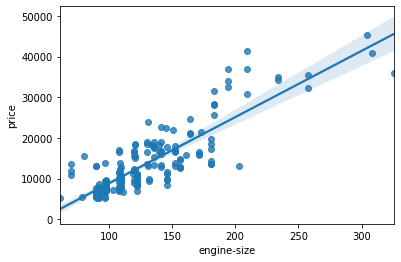

In [ ]:
# Engine size vs price
sns.regplot(x="engine-size", y="price", data=df)

Here we can see as the engine-size goes up, the price goes up

This indicates a positive correlation between engine size and price. 

If this is between two independent attributes, then we can remove either one of the attribute from dataset as redundency

But here it is between independent attribute(Engine Size)  and target attrbute(Price).

Therefore Engine size is a good predictor of price .
The correlation between 'engine-size' and 'price' and is nearly 0.87



In [ ]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.861752
price,0.861752,1.000000



#Negative linear relationship

**Highway mpg is a potential predictor variable of price**

Some decision we can get from the domain knowledge.

Let us understand.

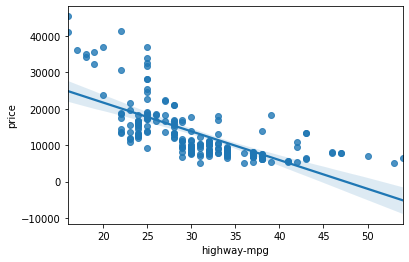

In [ ]:
sns.regplot(x="highway-mpg", y="price", data=df)

Here we can see, as the highway-mpg goes up, the price goes down This indicates an Negative relationship between these two variables. Therefore Highway mpg also be a potential predictor of price.

The correlation between 'highway-mpg' and 'price' is -0.7



In [ ]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.690526
price,-0.690526,1.000000


# **Some examples on Weak Linear Relationship**

**"Peak-rpm" can be a predictor variable of "price"???**


In [ ]:
peakRpm = df['peak-rpm'].loc[df['peak-rpm'] != '?']
prmean = peakRpm.astype(str).astype(int).mean()
df['peak-rpm'] = df['peak-rpm'].replace('?',prmean).astype(int)


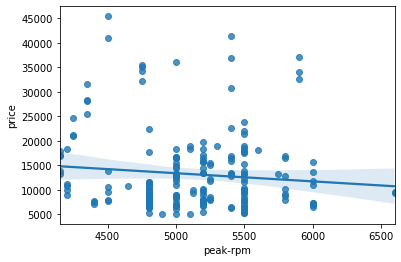

In [ ]:
sns.regplot(x="peak-rpm", y="price", data=df)


Peak rpm is not a good predictor of price as the data points are very scattered and far from the fitted line. Therefore it is not a reliable attribute to predict the price.

The correlation between 'peak-rpm' and 'price' and see is nearly -0.1



In [ ]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.100851
price,-0.100851,1.000000


"stroke" can be a predictor variable of "price"???

In [ ]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.000000,0.082095
price,0.082095,1.000000


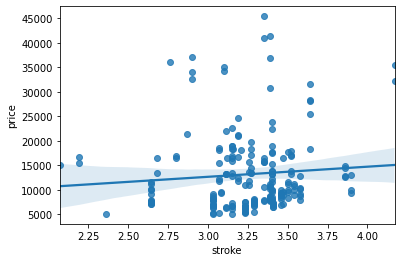

In [ ]:
sns.regplot(x="stroke", y="price", data=df)


Pearson Correlation Coefficient and P-Value
The Pearson Correlation measures the linear dependence between two Attributes.

The value ranges from -1 to 1

1: Total positive linear correlation.
0: No linear correlation, the two variables most likely do not affect each other.
-1: Total negative linear correlation.
We can Caluculate Pearson Correlation using the function "corr"

In [ ]:
df.corr()


,Unnamed: 0,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
Unnamed: 0,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260077,-0.160844,0.150276,-0.013346,-0.203545,0.015940,0.011255,-0.116555
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,-0.178515,0.071380,0.273678,-0.035823,0.034606,-0.082201
wheel-base,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351985,-0.360700,-0.470414,-0.544082,0.583168
length,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554408,-0.287034,-0.670909,-0.704662,0.682986
width,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642176,-0.219861,-0.642704,-0.677218,0.728699
height,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110114,-0.320599,-0.048640,-0.107358,0.134388
curb-weight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750973,-0.266282,-0.757414,-0.797465,0.820825
engine-size,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810705,-0.244600,-0.653658,-0.677470,0.861752
bore,0.260077,-0.130083,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575707,-0.254765,-0.584508,-0.586992,0.532300
stroke,-0.160844,-0.008689,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,0.186105,0.088133,-0.066860,-0.042179,-0.043961,0.082095


But sometimes we want to know the significant of the correlation, which means how much confident about the correlation.

In that case we calculate P-Value.

P-value:

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant.

when the

* p-value is $&lt;$ 0.001: we say there is strong evidence that the correlation is significant.
* the p-value is $&lt;$ 0.05: there is moderate evidence that the correlation is significant.
* the p-value is $&lt;$ 0.1: there is weak evidence that the correlation is significant.
* the p-value is $&gt;$ 0.1: there is no evidence that the correlation is significant.
Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between attribute variables is significant.

Let us understand by calculating some of the P-Values

We use "stats" module in the "scipy" library to calculate P-Value



In [ ]:
from scipy import stats

# **Wheel-base vs Price**

Let's calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.



In [ ]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is 0.5831682587228323  with a P-value of P = 4.527536401744334e-20


**Conclusion**:
Since the p-value is $&lt;$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

# **Horsepower vs Price**

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)


The Pearson Correlation Coefficient is 0.6829864946320212  with a P-value of P =  1.649801455844585e-29


***Conclusion***:
Since the p-value is $&lt;$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

# Width vs Price

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )


The Pearson Correlation Coefficient is 0.7286986760208304  with a P-value of P = 3.2146646385520774e-35


***Conclusion***:
Since the p-value is < 0.001, the correlation between width and price is statistically significant,

and the linear relationship is quite strong (~0.751).

# Curb-weight vs Price

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)


The Pearson Correlation Coefficient is 0.8208247364886392  with a P-value of P =  2.8663275083502856e-51


***Conclusion***:
Since the p-value is $&lt;$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

# Engine-size vs Price

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is 0.8617522313557834  with a P-value of P = 9.669743096805981e-62


***Conclusion***:
Since the p-value is $&lt;$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

We can relate the process for each 'City-mpg' and 'Highway-mpg':

# City-mpg vs Price

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)


The Pearson Correlation Coefficient is -0.6674493651999066  with a P-value of P =  8.463492369695295e-28


***Conclusion***:
Since the p-value is $&lt;$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.

# Highway-mpg vs Price

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value )


The Pearson Correlation Coefficient is -0.6905258861803291  with a P-value of P =  2.23237596903188e-30


***Conclusion***:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant,

and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.



In [ ]:
df.to_csv('car.csv')


**Goal : - What are the main characteristics which have the most impact on the car price?**

In [ ]:
path='car.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
del df['normalized-losses']

# Descriptive Statistical Analysis
When we begin to analyse data, it is important to first explore our data before we build machine learning models. One of the easy way to explore data is to calculate some descriptive statistics for the data. To get the statistical summery we can use the pandas method

a. dataframe.describe()
The describe function automatically computes basic statistics for all continuous variables. Any attributes with missing values are automatically skipped in these statistics.

This will show:

the count of that variable
the mean
the standard deviation (std)
the minimum value
boundary of each of the quartiles(25%, 50%, 75%)
the maximum value
We can apply the method "describe" as follows:



In [ ]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,102.000000,102.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.253659,5125.365854,25.219512,30.751220,13207.126829
std,59.322565,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519219,476.979095,6.542142,6.886443,7868.768212
min,0.000000,0.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,51.000000,51.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,102.000000,102.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,153.000000,153.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,204.000000,204.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,205.0,102.000000,59.322565,0.00,51.00,102.00,153.00,204.00
Unnamed: 0.1,205.0,102.000000,59.322565,0.00,51.00,102.00,153.00,204.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329751,0.270844,2.54,3.15,3.31,3.58,3.94


**Some important Observations**
Average values of Horse Power 104, Highway mileage is 30.75, Price is 13000 Dollars apporx.

Price ranges from 5000 Dollers to 45000 Dollers approx.

**b. df.describe(include=['object'])**
The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows: df.describe(include=['object']). These are categorical variables.

For object types columns a different set of statistics is evaluated

unique - no of distinct object in the column

top - most frequently occuring object for that particular column

freq - no of times the top object appears in the column



In [ ]:
df.describe(include=['object']).T


,count,unique,top,freq
make,205,22,toyota,32
fuel-type,205,2,gas,185
aspiration,205,2,std,168
num-of-doors,205,3,four,114
body-style,205,5,sedan,96
drive-wheels,205,3,fwd,120
engine-location,205,2,front,202
engine-type,205,7,ohc,148
num-of-cylinders,205,7,four,159
fuel-system,205,8,mpfi,94



**Some important Observations**

1) Top make are toyota cars.

2) Out of 205 cars 185 are Gas Fuel typed.

3) 202 cars have engine location in the front

In [ ]:
df.describe(include = "all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,205,NaN,NaN,NaN,102,59.3226,0,51,102,153,204
Unnamed: 0.1,205,NaN,NaN,NaN,102,59.3226,0,51,102,153,204
symboling,205,NaN,NaN,NaN,0.834146,1.24531,-2,0,1,2,3
make,205,22,toyota,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel-type,205,2,gas,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,205,2,std,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num-of-doors,205,3,four,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body-style,205,5,sedan,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drive-wheels,205,3,fwd,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine-location,205,2,front,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Another method to check dataset

In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         205 non-null    int64  
 1   Unnamed: 0.1       205 non-null    int64  
 2   symboling          205 non-null    int64  
 3   make               205 non-null    object 
 4   fuel-type          205 non-null    object 
 5   aspiration         205 non-null    object 
 6   num-of-doors       205 non-null    object 
 7   body-style         205 non-null    object 
 8   drive-wheels       205 non-null    object 
 9   engine-location    205 non-null    object 
 10  wheel-base         205 non-null    float64
 11  length             205 non-null    float64
 12  width              205 non-null    float64
 13  height             205 non-null    float64
 14  curb-weight        205 non-null    int64  
 15  engine-type        205 non-null    object 
 16  num-of-cylinders   205 non

# 3. Visualization Using Box Plots
Boxplots are a good way to visualize categorical variables
Categorical variables
1. These are variables that describe a 'characteristic' of a data and selected from a small group of categories. 

2. The categorical variables can have the type "object" or "int64". (For example the rating attribute may have the values "Good, V.Good, Best" or "1 , 2 , 3")
To install seaborn we use the pip which is the python package manager.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Let's look at the relationship between "body-style" and "price".

In [ ]:
df['body-style'].unique()


array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

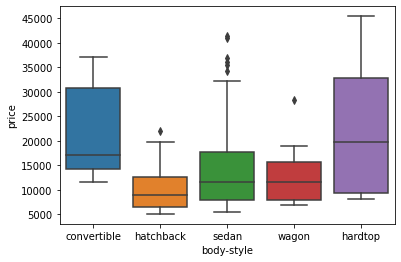

In [ ]:
sns.boxplot(x="body-style", y="price", data=df)


As the distributions of price between the different body-style categories have a significant overlap, body-style would not be a good predictor of price.

The predictor variable :- Variable used to predict an outcome. In this case predictor variable is the body-style.

The target Variable :- Variable we are trying to predict. In this case our target variable is the price.

Let's examine engine "engine-location" and "price":</p>



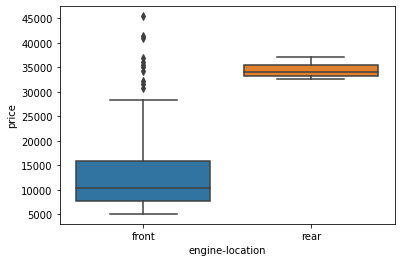

In [ ]:
sns.boxplot(x="engine-location", y="price", data=df)

The distribution of price between these two engine-location categories are distinct. So engine-location can be taken as potential good predictor of price.
Let's examine "drive-wheels" and "price".

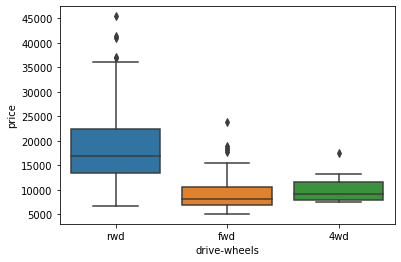

In [ ]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

Here we see that the distribution of price between front-wheel drive and four-wheel drive overlap, but rear-wheel drive and other categories are distinct; Therefore drive-wheels could potentially be a predictor of price.



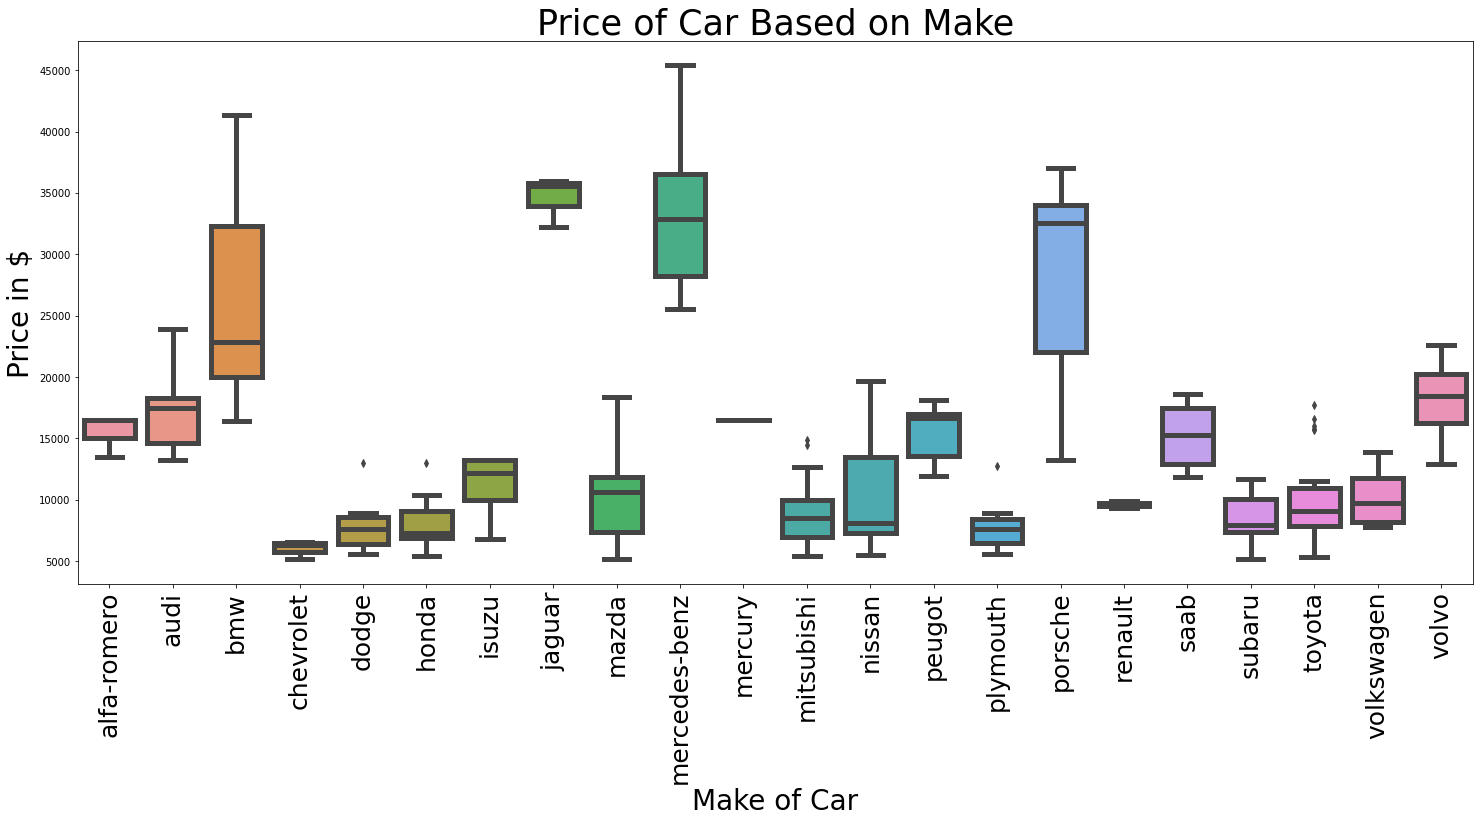

In [ ]:

plt.rcParams['figure.figsize']=(25,10)
ax = sns.boxplot(x="make", y="price", data=df,width=0.8,linewidth=5)
ax.set_xlabel('Make of Car',fontsize=28)
ax.set_ylabel('Price in $',fontsize=28)
plt.title('Price of Car Based on Make',fontsize=35)
ax.tick_params(axis='x',labelsize=25,rotation=90)


Some insights : -
The expensive cars in the dataset are Mercedes Benz , BMW and Prosche. This is a very old dataset from 1985. So price of the cars are very low.
# 4. Value Counts
Value-counts is a good way of understanding how many units of each unique value are there in a categorical variable. Let us apply the "value_counts" method on the column 'drive-wheels'. Don’t forget the method "value_counts" only works on Pandas series, not Pandas Dataframes. We only include one bracket "df['drive-wheels']" not two brackets "df[['drive-wheels']]".

In [ ]:
df['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

Output is also pandas series. We can convert the series to a Dataframe using the method to_frame() :

In [ ]:
df['drive-wheels'].value_counts().to_frame()


,drive-wheels
fwd,120
rwd,76
4wd,9


Value_counts() for the variable 'engine-location'.



In [ ]:
df['engine-location'].value_counts().to_frame()

,engine-location
front,202
rear,3


In [ ]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head()


,value_counts
engine-location,
front,202
rear,3


**Engine location is not a good predictor variable for the price.**

This is because We only have 3 cars with a rear engine and 198 cars with an front engine, This result is skewed. So We are not able to draw any conclusions about the price of the car using engine location attribute.

**Finding Missing Value using Value_counts()**

In [ ]:
df.describe(include=['object']).T

,count,unique,top,freq
make,205,22,toyota,32
fuel-type,205,2,gas,185
aspiration,205,2,std,168
num-of-doors,205,3,four,114
body-style,205,5,sedan,96
drive-wheels,205,3,fwd,120
engine-location,205,2,front,202
engine-type,205,7,ohc,148
num-of-cylinders,205,7,four,159
fuel-system,205,8,mpfi,94


In [ ]:
df['num-of-doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [ ]:
df['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

num-of-doors is missing in two places. We can replace the missing values with value 'four' as it is Mode(most frequently occures).

If it is a numerical variable we may use mean to replace the missing value.

In [ ]:
a=df['num-of-doors'].map({'two':2,'four':4,'?':4})
df['num-of-doors']=a

In [ ]:
df['num-of-doors'].value_counts()

4    116
2     89
Name: num-of-doors, dtype: int64

# Basics of Grouping
The "groupby" method groups data by different categories.

For example, let's group by the variable "drive-wheels". There are 3 different categories of drive wheels.

In [ ]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

If we want to know, on average, which type of drive wheel is most valuable?? We can group "drive-wheels" and then average them.

We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".



In [ ]:
df_group_one = df[['drive-wheels','body-style','price']]


We can then calculate the average price for each of the different categories of data.

In [ ]:
# grouping results
df_group_by_dw = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_by_dw

,drive-wheels,price
0,4wd,10570.555556
1,fwd,9310.816667
2,rwd,19671.421053


In this dataset, rear-wheel drive vehicles are, on average, the most expensive, 4-wheel and front-wheel are approximately the same in price.

We can also group with multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'.



In [ ]:
# grouping results
#df_gptest = df[['drive-wheels','body-style','price']]
df_group_by_bs_dw = df_group_one.groupby(['drive-wheels','body-style'],as_index=False).mean()
df_group_by_bs_dw

,drive-wheels,body-style,price
0,4wd,hatchback,10405.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9930.929825
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


**Pivot Table**

This grouped data is much easier to visualize when it is made into a pivot table.

We can convert the dataframe to a pivot table using the method "pivot " to create a pivot table from the groups.

A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row.

In this case, we take drive-wheel variable as the rows of the table body-style as columns of the table:



In [ ]:
grouped_pivot = df_group_by_bs_dw.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9930.929825   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

In [ ]:
df[df['body-style'] == 'convertible']

,Unnamed: 0,Unnamed: 0.1,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
72,72,72,3,mercedes-benz,gas,std,2,convertible,rwd,front,96.6,180.3,70.5,50.8,3685,ohcv,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056
128,128,128,3,porsche,gas,std,2,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028
172,172,172,2,toyota,gas,std,2,convertible,rwd,front,98.4,176.2,65.6,53.0,2975,ohc,four,146,mpfi,3.62,3.50,9.3,116,4800,24,30,17669
189,189,189,3,volkswagen,gas,std,2,convertible,fwd,front,94.5,159.3,64.2,55.6,2254,ohc,four,109,mpfi,3.19,3.40,8.5,90,5500,24,29,11595


In [ ]:
df[df['body-style'] == 'hardtop']

,Unnamed: 0,Unnamed: 0.1,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
69,69,69,0,mercedes-benz,diesel,turbo,2,hardtop,rwd,front,106.7,187.5,70.3,54.9,3495,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,28176
74,74,74,1,mercedes-benz,gas,std,2,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400
98,98,98,2,nissan,gas,std,2,hardtop,fwd,front,95.1,162.4,63.8,53.3,2008,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,8249
126,126,126,3,porsche,gas,std,2,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900,17,25,32528
127,127,127,3,porsche,gas,std,2,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900,17,25,34028
167,167,167,2,toyota,gas,std,2,hardtop,rwd,front,98.4,176.2,65.6,52.0,2540,ohc,four,146,mpfi,3.62,3.50,9.3,116,4800,24,30,8449
168,168,168,2,toyota,gas,std,2,hardtop,rwd,front,98.4,176.2,65.6,52.0,2536,ohc,four,146,mpfi,3.62,3.50,9.3,116,4800,24,30,9639
170,170,170,2,toyota,gas,std,2,hardtop,rwd,front,98.4,176.2,65.6,52.0,2679,ohc,four,146,mpfi,3.62,3.50,9.3,116,4800,24,30,11199


We can fill these missing cells with the value 0

In [79]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  0.0      0.000000  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9930.929825   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

In [80]:
df.to_csv('car.csv')


Goal : - What are the main characteristics which have the most impact on the car price?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


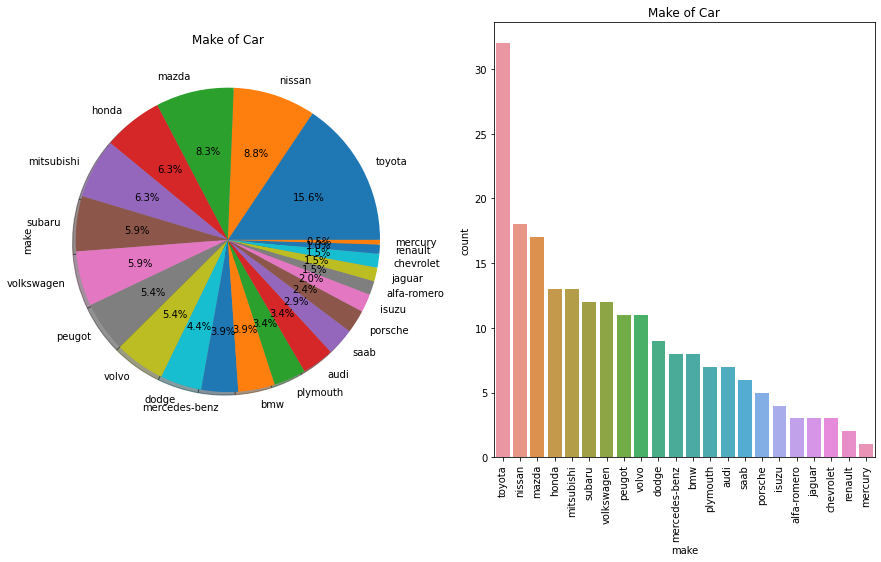

In [81]:
f,ax=plt.subplots(1,2,figsize=(15,8))
df['make'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Make of Car')
sns.countplot('make',data=df,ax=ax[1],order=df['make'].value_counts().index)
ax[1].set_title('Make of Car')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
plt.show()

In [82]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

We have more Japanese Cars in the Dataset followed by European

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


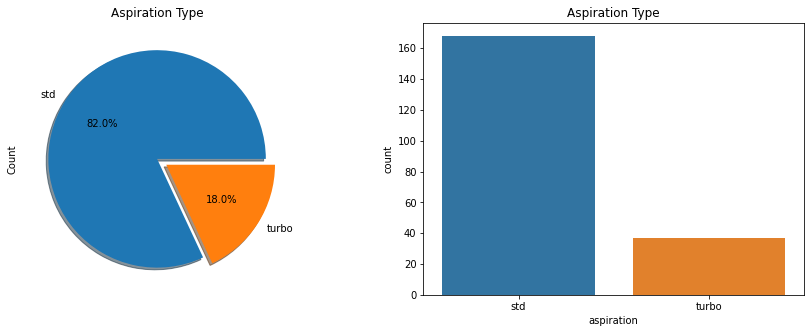

In [83]:
f,ax=plt.subplots(1,2,figsize=(15,5))
df['aspiration'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Aspiration Type')
ax[0].set_ylabel('Count')
sns.countplot('aspiration',data=df,ax=ax[1],order=df['aspiration'].value_counts().index)
ax[1].set_title('Aspiration Type')
plt.show()

Most vehicle have standard Aspiration.The reason is this data set is very old.Now a days most vehicles have turbo system which improves efficiency and power output from an engine.



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


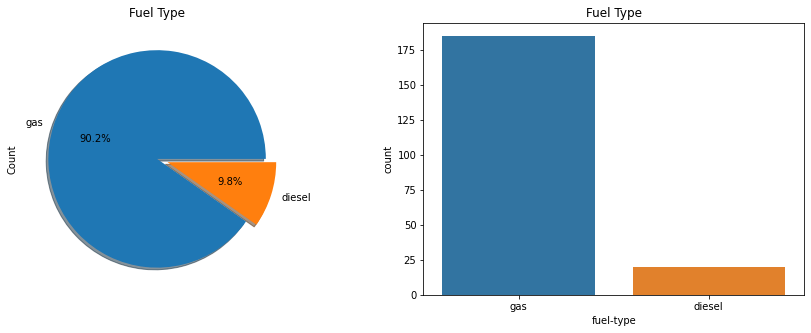

In [84]:
f,ax=plt.subplots(1,2,figsize=(15,5))
df['fuel-type'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Fuel Type')
ax[0].set_ylabel('Count')
sns.countplot('fuel-type',data=df,ax=ax[1],order=df['fuel-type'].value_counts().index)
ax[1].set_title('Fuel Type')
plt.show()

We can see that 90% of the cars in the Data Set are Petrol.US is a Gasoline market unlike Europe and India which have more Share of Diesel Cars

Understanding the range of important features - univariate analysis

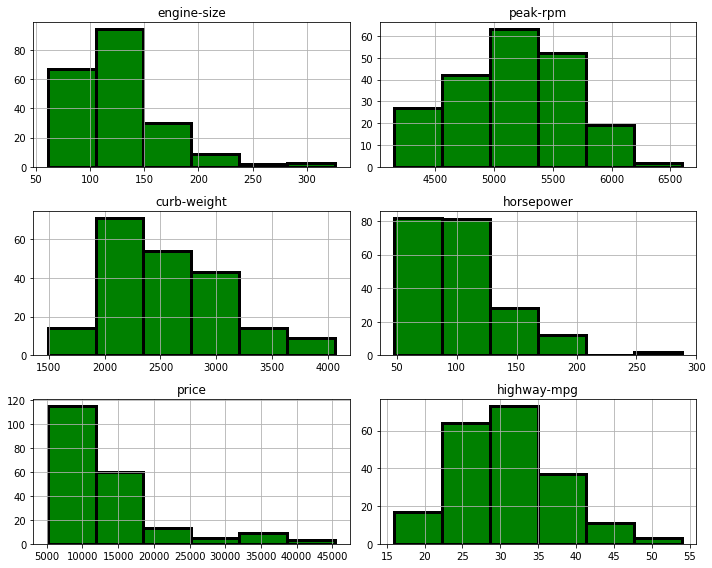

In [85]:
df[['engine-size','peak-rpm','curb-weight','horsepower','price','highway-mpg']].hist(figsize=(10,8),bins=6,color='g',linewidth='3',edgecolor='k')
plt.tight_layout()
plt.show()

1.Curb weight: Is the total weight of the vehicle without the weight of the passenger.It includes weight of coolants,oil and fuel.Defination of curb weight may vary based on the standard adopted by a country.In this data set the curb weight of most cars is in the range 2000-3100 lbs.

2.Engine Size: The size of an engine is measured in cubic centimetres (cc) and refers to the total volume of air and fuel that's pushed through the engine by its cylinders. For example, a 1,000cc engine has the capacity to displace one litre - or 1,000 cubic centimetres - of this air-fuel mixture.

It is usually expressed using the metric units of cubic centimetres or litres or – particularly in the United States – cubic inches (CID, cu in, or in3).

1000

#cubic centimetre
61.0237

Cubic inch

In this dataset it is ranges from is inrange 60 to 190.

3.Highway-mpg: It is the amount of miles the car travels with one gallon of fuel.

4.Horse Power: It is the measure of the power of the engine.Most vehicle has horsepower 50 to 125

5.Peak rpm: RPM (Reolutions per minute) is the measure of the speed of roation of Engine per minute. It is mostly distributed between 4600 to 5700

6.Price: This is a old data so it shows very low car prices.Most Vehicle are in price range 5000 to 18000

#Heat Maps
Heat Map from pivot table

Correlation Heat Map

Plotting heat map to understand correlations between diffeent features



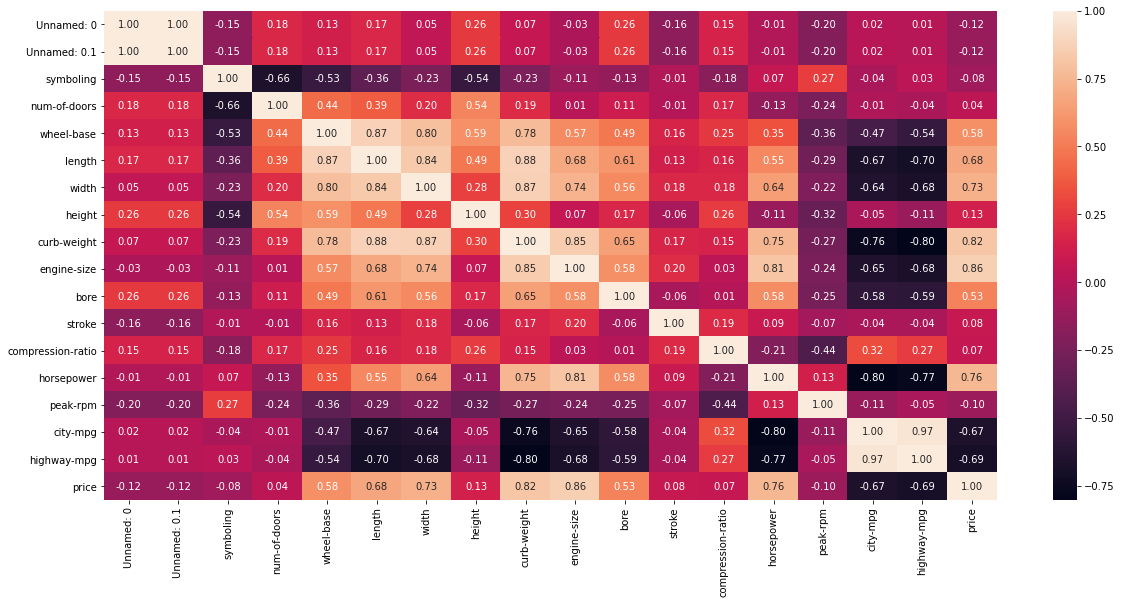

In [86]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(20,9))
a = sns.heatmap(corr, annot=True, fmt='.2f')

Findings

curb-size, engine-size, horsepower are positively corelated city-mpg,highway-mpg are negatively corelated

From a Pair plot we can try to Vizualise the correlation of parameters



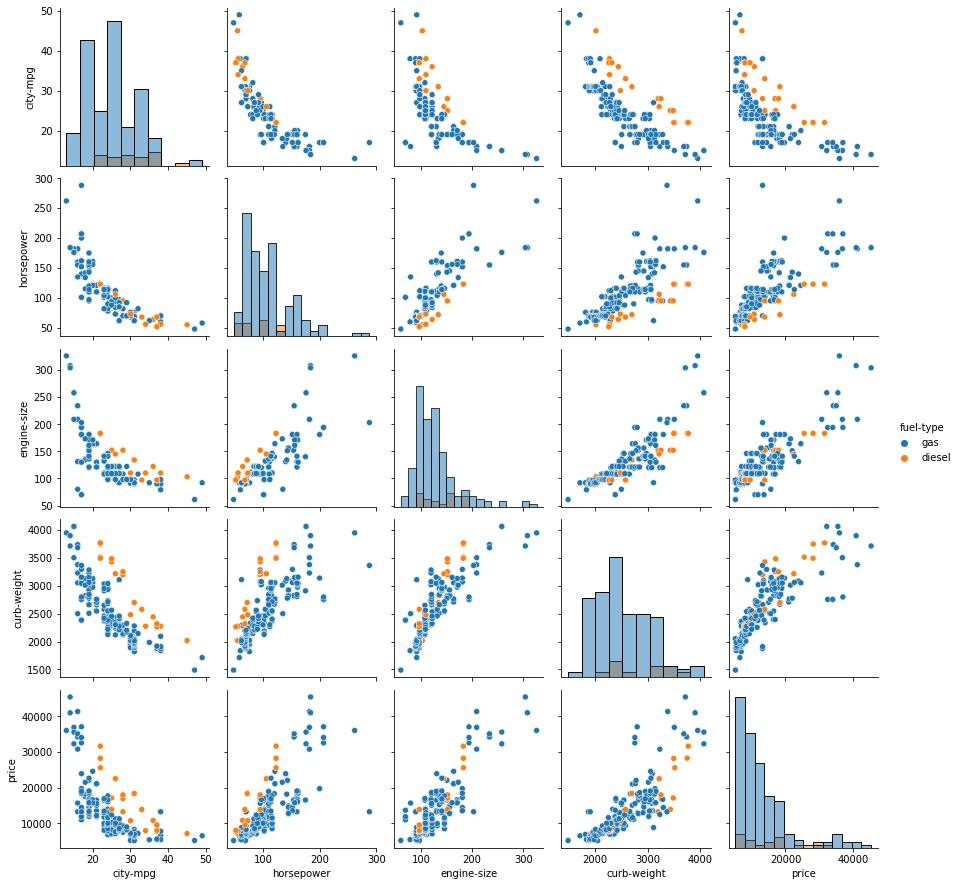

In [87]:
g = sns.pairplot(df[["city-mpg", "horsepower", "engine-size", "curb-weight","price", "fuel-type"]], hue="fuel-type", diag_kind="hist")


Findings

Vehicle Mileage decrease as increase in Horsepower , engine-size, Curb Weight As horsepower increase the engine size increases Curbweight increases with the increase in Engine Size Price Analysis

engine size and curb-weight is positively co realted with price city-mpg is negatively corelated with price as increase horsepower reduces the mileage

1.Vehicle with high price have low mileage.This because high priced vehicles go into luxary segment which are meant for high performance and running cost is not very important in this segment.

2.As the engine power(horse power) increases the price of the vehicle increases.More horse power also means bigger engine size

3.As the engine size increases the price of the vehicle increases.Weight of the engine increases with the increase in engine size.

4.High curb weight increases price of the vehicle and decreases the mileage of the vehicle.

5.Width has very good positive correlation to the price of the vehicle.

ANNOVA TEST

**Conclusion: Important Variables**
We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

Length
Width
Curb-weight
Engine-size
Horsepower
City-mpg
Highway-mpg
Wheel-base
Bore
Categorical variables:

Drive-wheels
As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

**Thank you**